# Proyecto 1: Analisis de sentimientos de peliculas

### Importacion de librerias necesarias

In [5]:
import string

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [3]:
pd.set_option('display.max_colwidth', None)

In [49]:
# Descargando las stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/estebangonzalezruales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/estebangonzalezruales/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [50]:
# Función para tokenizar los reviews
def tokenizer(text):
    return word_tokenize(text)

### Carga de datos

In [13]:
df = pd.read_csv("./data/MovieReviews.csv", index_col=0)

In [14]:
df.shape

(5000, 2)

In [15]:
df.sample(5)

,review_es,sentimiento
3251,"Cómo esta película podría perderse muchos de los aspectos fascinantes, complejos y misteriosos de la historia original o la película original es verdaderamente notable.Una trama increíblemente delgada y de desensagogina, caracterización / motivación profunda del tobillo y una banda sonora realmente horrible (reemplazando la tensión con vastas franjas de ruido, reemplazando las referencias musicales arcanas del original para accidentes y rugidos digitalizados. Luego están las referencias específicas al original.que se simplemente se ""enlucidos en"" sobre las grietas ... terrible. En un mundo donde los remakes americanos sin gormas, los remakes americanos muertos cerebrales (aparece una lágrima), obtenga Carter (sollozos incontrolablemente) y Alfie ha profanado nuestras pantallas recientemente,Este toma la galleta proverbial. Tonterías execrables. Cómo se involucró el Elen Rurstyn es una maravilla ... Rubbish.",negativo
1456,"Este es el caso clásico de una excelente película que está siendo examinada por el público estadounidense simplemente debido al hecho de que no tenía Bruce Willis o Arnold Schwarzenneger como el hombre principal: Adrian Quinn hace un mejor rendimiento dual, eso es el derecho, lo escuchó dual. ¡Rendimiento en esta película de lo que cualquiera de los de ellos ha retirado en sus carreras! Bueno, de todos modos, ahora a la revisión ... La tarea se basa libremente en la historia de Carlos The Jackal, un radical de la década de 1970 que aterrorizó a Europa durante años antes de que finalmente sean detenidos por los agentes franceses. En esta adaptación, un oficial naval estadounidense (Adrian Quinn) está de permiso en Israel cuando es detenido por Mossad (la agencia de inteligencia / inteligencia de crack / contracerrorismo de Isreal) y asumió la pregunta debido al hecho de que se ve exactamente como el chacal (este Es la parte extremadamente quea de la película, pero confía en mí, no restaba por el gran valor de esta película). Sin embargo, cuando se descubre que el Sr. Ramírez no es el Jackal, es reclutado por un agente de la CIA endurecido por el nombre de Jack Shaw (Donald Sutherland, quien hace su habitual rutina de la figura de la Misteriosa Autoridad del Gobierno, pero de manera estúpida) que tiene Pasé su vida cazando al chacal, y la serie de eventos que siguen cautivarán a cualquiera que vea esta película, se llena de gran actuación, sin todos los clichés de la película de acción habitual y de un solo trazado, y una gran parcela que sorprenderá a cualquiera. . Los tres hombres principales: Quinn, Sutherland y Kingsley, llevan esta película mucho más allá de lo que su presupuesto modesto habría permitido a cualquier otra persona llenando sus zapatos. También kudos al director y su personal, los ángulos de la cámara y la cinematografía son de primera categoría, especialmente en las escenas de acción. La asignación es mejor que cualquier persona que se alquila podría esperar, es una pena que la película hizo bastante mal en la taquilla, de lo contrario podríamos ver una secuela de este estupendo suspenso de espionaje. ¡9/10 estrellas, este crítico lo recomienda altamente a todos los espectadores potenciales!",positivo
2310,"Esta es una excelente película que aborda el tema del racismo de una manera delicada y equilibrada.Grandes actuaciones completas, pero absolutamente destacadas por Sidney Poitier. Hace que esta película respire y viva.Su representación de un chico que lucha contra la discriminación y la violencia es simplemente la mente que sopla.Su actuación es contundente y delicado y sutil al mismo tiempo.Verdaderamente digno de un Oscar, Poitier tuvo que esperar (debido a su color de la piel) durante muchos años antes de que la academia también reconociera la brillante brillantez de su actuación. La Academia.Cassavetes también se convierte en un gran rendimiento, retirado, preocupado y realista como tieneConviértete en su sello.Él y Poitier contrastan inimitablemente la

In [11]:
df["sentimiento"].value_counts(dropna=False, normalize=True)

positivo    0.5
negativo    0.5
Name: sentimiento, dtype: float64

### Dividir los reviews en conjuntos de entrenamiento y prueba

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df["review_es"], df["sentimiento"], test_size = 0.2, stratify = df["sentimiento"], random_state = 1)

In [52]:
X_train.shape

(4000,)

In [53]:
pd.Series(y_train).value_counts(normalize=True)

negativo    0.5
positivo    0.5
Name: sentimiento, dtype: float64

In [54]:
X_test.shape

(1000,)

In [55]:
pd.Series(y_test).value_counts(normalize=True)

negativo    0.5
positivo    0.5
Name: sentimiento, dtype: float64

### Vectorizando los reviews

In [56]:
bow = CountVectorizer(tokenizer=tokenizer, stop_words=list(stop_words), lowercase=True)

In [57]:
X_bow = bow.fit_transform(X_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [58]:
len(bow.vocabulary_)

62967

In [64]:
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words=list(stop_words), lowercase=True)

In [65]:
X_tfidf = tfidf.fit_transform(X_train)

In [66]:
len(tfidf.vocabulary_)

62967

### Entrenando y evaluando un modelo usando BoW
##### Modelo entrenado por: Esteban Gonzalez Ruales

In [67]:
bow_model = RandomForestClassifier(random_state = 2)

In [68]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

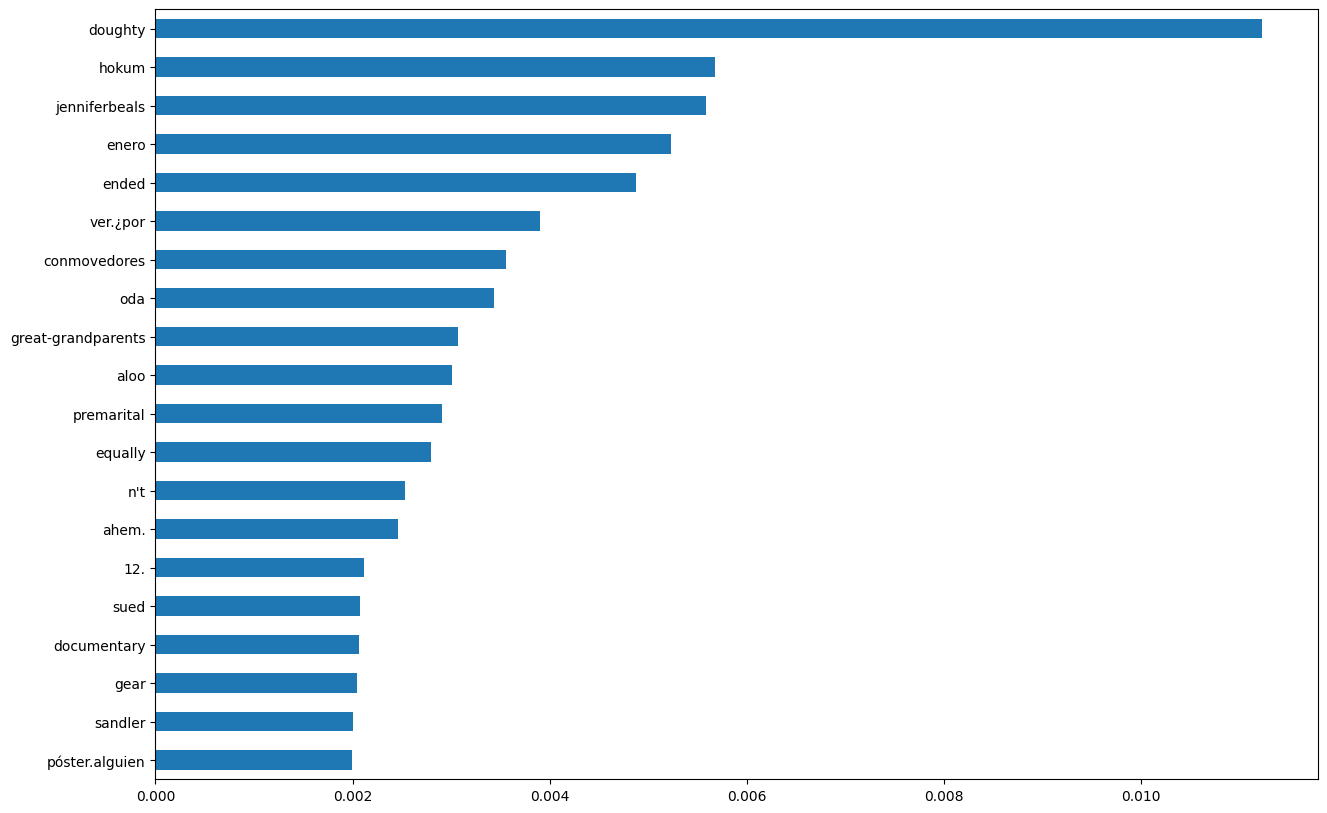

In [69]:
pd.Series(bow_model.feature_importances_, index = bow.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [70]:
bow_estimators = bow_model.estimators_
print('Number of trees:', len(bow_estimators))
print('Trees depth (mean):', np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 190.92


In [71]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test))

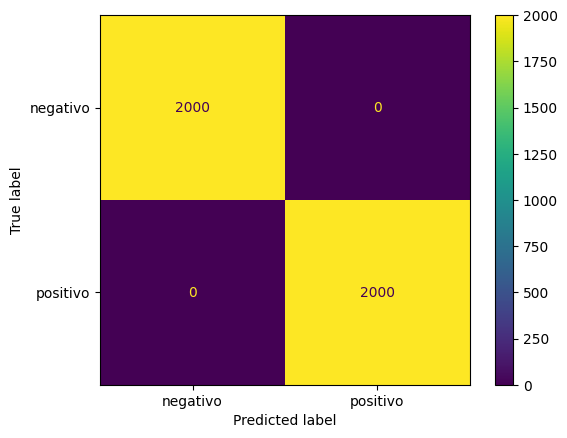

In [72]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

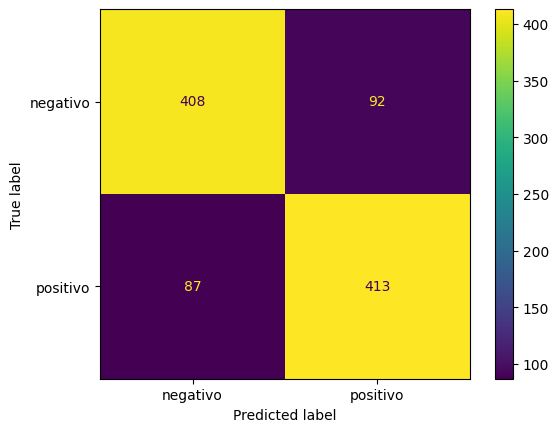

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [75]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_train, y_train_bow_predict, pos_label = 'positivo'))
    print('Recall:', recall_score(y_train, y_train_bow_predict, pos_label = 'positivo'))
    print('F1:', f1_score(y_train, y_train_bow_predict, pos_label = 'positivo'))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_train, y_train_bow_predict, average = None))
    print('Recall:', recall_score(y_train, y_train_bow_predict, average = None))
    print('F1:', f1_score(y_train, y_train_bow_predict, average = None))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [76]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 'positivo'))
    print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 'positivo'))
    print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 'positivo'))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
    print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
    print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: 0.8178217821782178
Recall: 0.826
F1: 0.8218905472636815


### Entrenando y evaluando un modelo usado TF-IDF
##### Modelo entrenado por: Juan Diego Yepes

In [77]:
tfidf_model = RandomForestClassifier(random_state = 3)

In [79]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<Axes: >

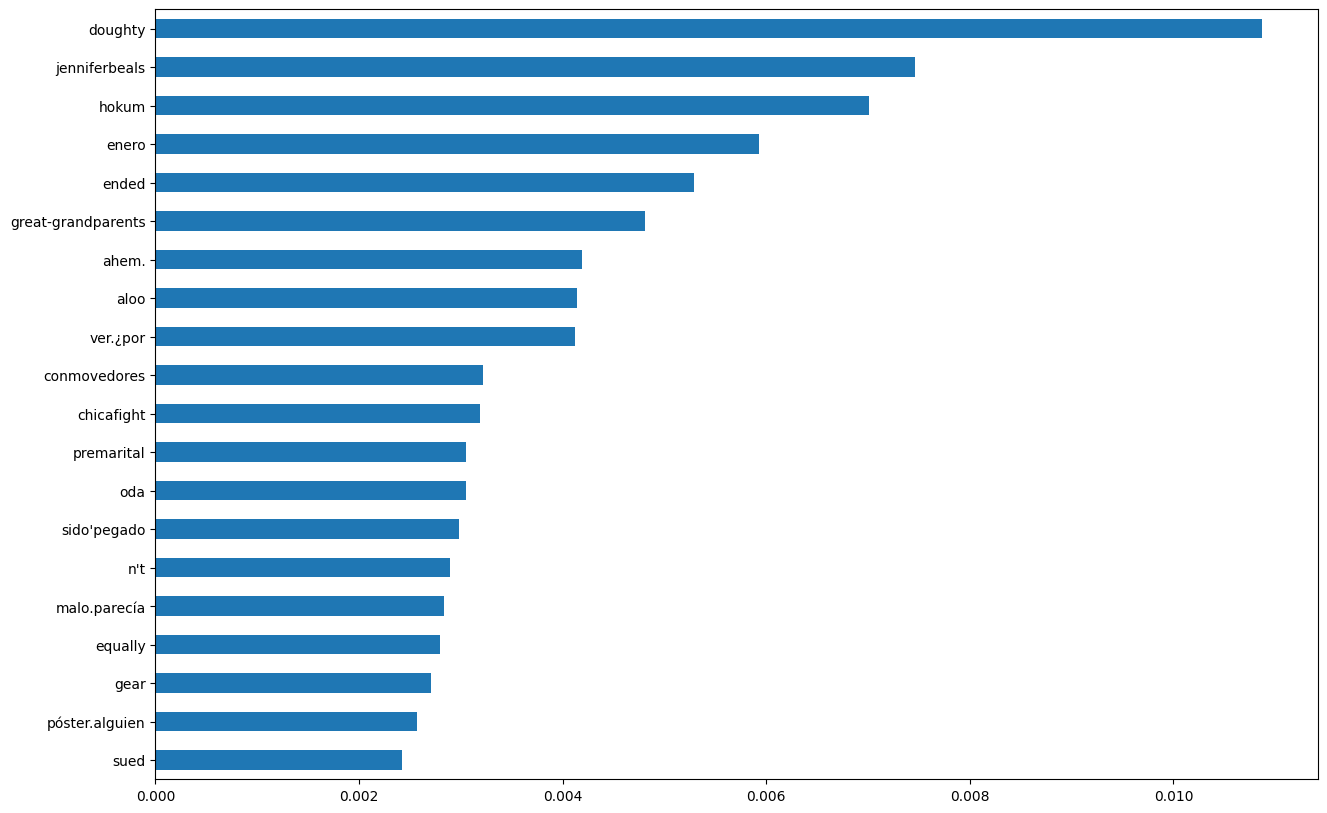

In [80]:
pd.Series(tfidf_model.feature_importances_, index = tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [81]:
tfidf_estimators = tfidf_model.estimators_
print('Number of trees:', len(tfidf_estimators))
print('Trees depth (mean):', np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 169.51


In [82]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test))

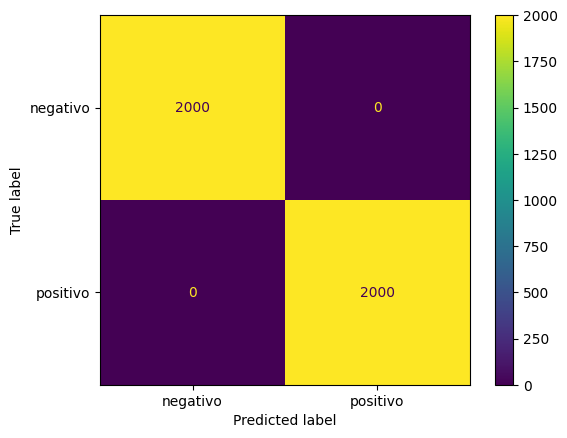

In [83]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

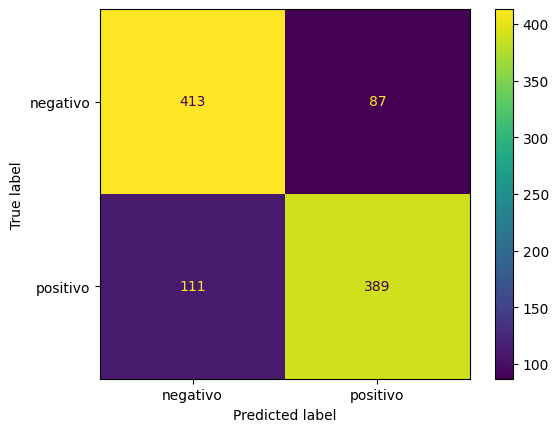

In [84]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [86]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_train, y_train_tfidf_predict, pos_label = 'positivo'))
    print('Recall:', recall_score(y_train, y_train_tfidf_predict, pos_label = 'positivo'))
    print('F1:', f1_score(y_train, y_train_tfidf_predict, pos_label = 'positivo'))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_train, y_train_tfidf_predict, average = None))
    print('Recall:', recall_score(y_train, y_train_tfidf_predict, average = None))
    print('F1:', f1_score(y_train, y_train_tfidf_predict, average = None))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [88]:
if len(tfidf_model.classes_) == 2:
    print('Precision:', precision_score(y_test, y_test_tfidf_predict, pos_label = 'positivo'))
    print('Recall:', recall_score(y_test, y_test_tfidf_predict, pos_label = 'positivo'))
    print('F1:', f1_score(y_test, y_test_tfidf_predict, pos_label = 'positivo'))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
    print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
    print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: 0.8172268907563025
Recall: 0.778
F1: 0.7971311475409837
